# Is Suicide a First World Problem?

It's been said numerous times that suicide is a problem of the first world, the richest countries[1], the happiest countries[2][3].  It almost feels like a cathartic jab at the successful.  However, there are other sources emerging that suggest that suicide and mental illness are really a global problem[1][2][3].  I want to analyze the relationship between suicide and global development indicators[7].

### References:
1. https://bamituniabamu.wordpress.com/2013/05/31/developed-countries-and-its-love-for-suicide-a-paradox-yet-unexplained/
2. https://well.blogs.nytimes.com/2011/04/22/happiest-places-post-highest-suicide-rates/?_r=0
3. http://www.conservativehome.com/the-deep-end/2015/07/why-do-the-happiest-countries-have-the-highest-suicide-rates.html
4. http://www.who.int/mental_health/prevention/suicide/suicideprevent/en/
5. https://www.quora.com/Why-is-depression-more-prevalent-in-first-world-countries
6. http://www.psyweb.com/news/depression/depression-and-anxiety-found-all-around-the-world
7. https://en.wikipedia.org/wiki/Developing_country#Definition

### Data Sources:
- Worlbank Developent Indicators
  - Fertility, http://data.worldbank.org/indicator/SP.DYN.TFRT.IN?view=map&year=1960
  - Literacy, http://data.worldbank.org/indicator/SE.ADT.LITR.ZS?end=2010&start=1990&view=map&year=1990
  - GDP, http://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=map
  - GNI, http://data.worldbank.org/indicator/NY.GNP.PCAP.CD?view=map&year=2015
  - Life Expectency, http://data.worldbank.org/indicator/SP.DYN.LE00.IN?end=2014&start=2014&view=map&year=2014
  - http://data.worldbank.org/data-catalog/world-development-indicators
- Democracy Indicators
  - http://www.democracybarometer.org/dataset_en.html
- ISO3 Country Codes
  - https://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code
- Suicide Rates
  - https://data.oecd.org/healthstat/suicide-rates.htm

In [291]:
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(15,9)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import feature_extraction as skfe
from sklearn import ensemble as sken
from sklearn import linear_model as sklin

import copy

import os

In [292]:
data_dir = 'data/'

for f in sorted(os.listdir(data_dir)):
    print(f)

fert_file = data_dir + 'fertility_per_woman_by_country.csv'
# gdp_file = data_dir + 'gdp_per_capita_by_country.csv'
gni_file = data_dir + 'gni_per_capita_by_country.csv'
life_file = data_dir + 'life_expectancy_by_country.csv'
lit_file = data_dir + 'literacy_by_country.csv'

suicide_file = data_dir + 'suicide_per_100k_by_country.csv'

.~lock.gdp_per_capita_by_country.csv#
.~lock.suicide_per_100k_by_country.csv#
democracy_data_by_country.xls
development_indicators_by_country.csv
fertility_per_woman_by_country.csv
gdp_per_capita_by_country.csv
gni_per_capita_by_country.csv
iso_3_countries.txt
iso_3_countries.txt~
life_expectancy_by_country.csv
literacy_by_country.csv
suicide_per_100k_by_country.csv


In [293]:
frt_df = pd.read_csv(fert_file)
# gdp_df = pd.read_csv(gdp_file)
gni_df = pd.read_csv(gni_file)
lex_df = pd.read_csv(life_file)
lit_df = pd.read_csv(lit_file)

scd_df = pd.read_csv(suicide_file)

In [294]:
def is_num(x):
    try:
        float(x)
        return True
    except:
        return False


def get_data(df, field, data_dict):
    for index, row in df.iterrows():
        country = row['Country Name']
        cc = row['Country Code']
        
        if cc not in data_dict:
            data_dict[cc] = {}
        
        for k in list(row.keys()):
            if is_num(k):
                str_k = str(k)
                if str_k not in data_dict[cc]:
                    data_dict[cc][str_k] = {}
                
                data_dict[cc][str_k][field] = row[k]

In [295]:
data_dict = {}
get_data(frt_df, 'fert', data_dict)
# get_data(gdp_df, 'gdp',  data_dict)
get_data(gni_df, 'gni',  data_dict)
get_data(lex_df, 'lex',  data_dict)
get_data(lit_df, 'lit',  data_dict)

In [296]:
target_name = 'TOT'

for index, row in scd_df.iterrows():
    cc = row['LOCATION']
    yr = str(row['TIME'])
    scd = row['Value']
    subj = row['SUBJECT']
    
    if cc not in data_dict:
        data_dict[cc] = {}
    
    if yr not in data_dict[cc]:
        data_dict[cc][yr] = {}
    
    if subj == target_name:
        data_dict[cc][yr]['TARGET'] = scd


In [297]:
input_dicts = []

for cc in data_dict:
    for yr in data_dict[cc]:
        row = copy.deepcopy(data_dict[cc][yr])
#         row['ctry'] = cc
        row['yr'] = int(yr)
        input_dicts.append(row)

In [298]:
DV = skfe.DictVectorizer(sparse=False)
all_data = np.nan_to_num(DV.fit_transform(input_dicts))
tgt_idx = DV.vocabulary_['TARGET']

targets = all_data[:, tgt_idx]
print(all_data.shape)
inputs = np.delete(all_data, tgt_idx, 1)
print(inputs.shape)

(15048, 6)
(15048, 5)


In [299]:
print(DV.feature_names_)

['TARGET', 'fert', 'gni', 'lex', 'lit', 'yr']


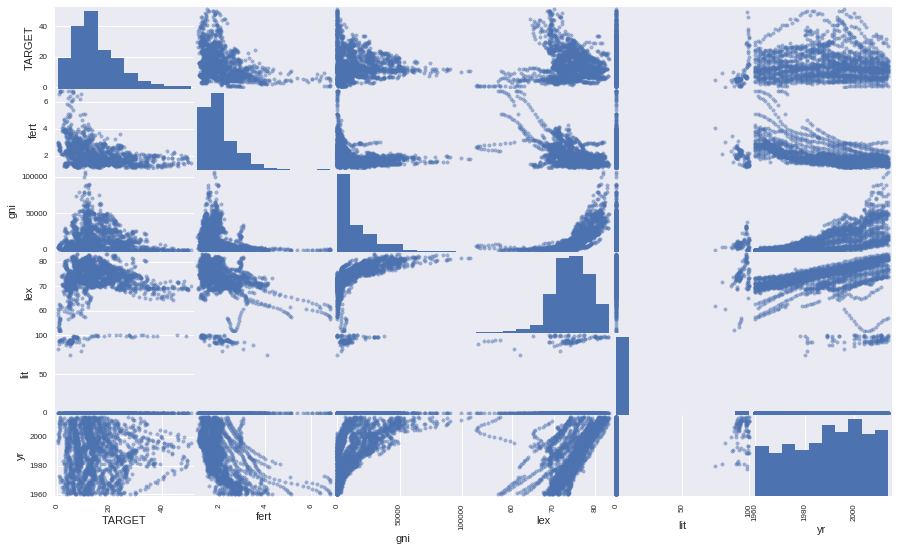

In [302]:
pd.tools.plotting.scatter_matrix(all_df)
plt.show()

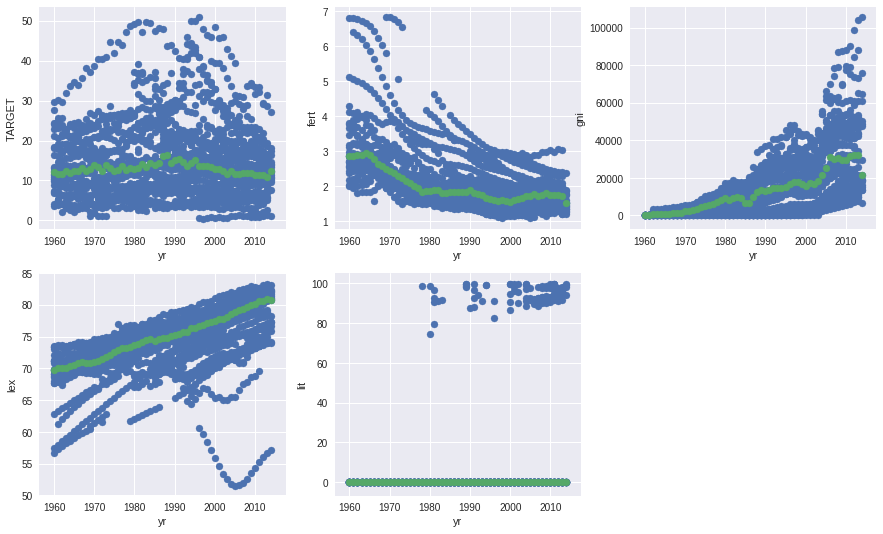

In [303]:
yr_means = {}
for f in list(all_df):
    yr_means[f] = {}
    for yr in all_df['yr'].unique():
        yr_means[f][yr] = np.median(all_df[all_df['yr'] == yr][f])

for i, f in enumerate([x for x in list(all_df) if x != 'yr']):
    sorted_items = sorted(list(yr_means[f].items()), key=lambda x: int(x[0]))
    years = list(map(lambda x: x[0], sorted_items))
    averages = list(map(lambda x: x[1], sorted_items))
    
    plt.subplot(2,3,i + 1)
    plt.scatter(all_df['yr'], all_df[f])
    plt.scatter(years, averages)
    plt.ylabel(f)
    plt.xlabel('yr')

plt.show()

In [304]:
new_df = pd.DataFrame()
print(list(all_df))
for f in list(all_df):
    new_df[f + '_detrend'] = all_df.apply(lambda x: x[f] - yr_means[f][x['yr']], axis=1)
del new_df['yr_detrend']
print(list(new_df))

['TARGET', 'fert', 'gni', 'lex', 'lit', 'yr']
['TARGET_detrend', 'fert_detrend', 'gni_detrend', 'lex_detrend', 'lit_detrend']


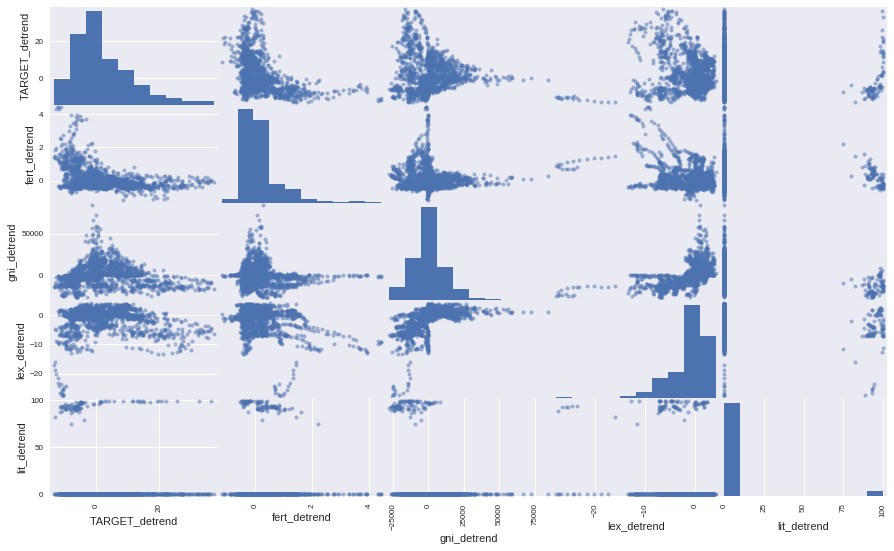

In [305]:
pd.tools.plotting.scatter_matrix(new_df)
plt.show()

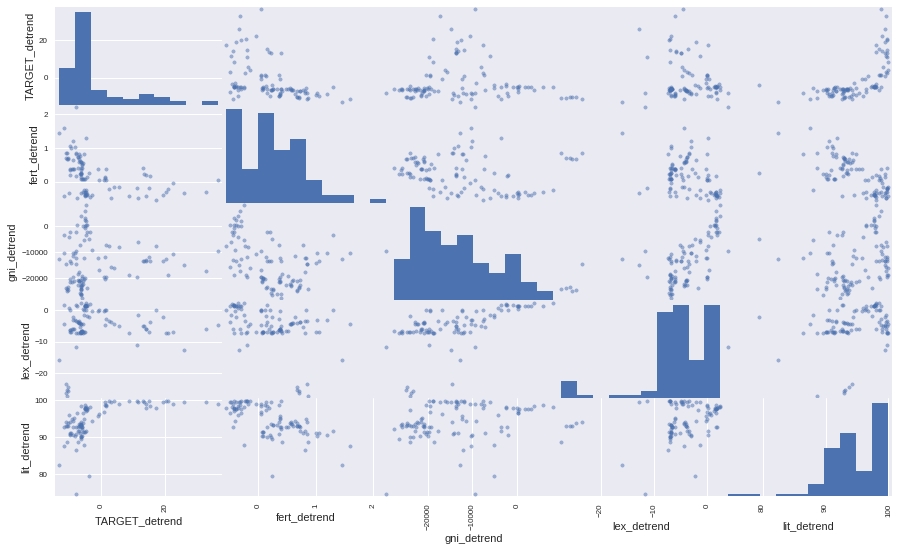

In [307]:
lit_nz_df = new_df[new_df['lit_detrend'] != 0]
pd.tools.plotting.scatter_matrix(lit_nz_df)
plt.show()